In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earthquake-alert-prediction-dataset/earthquake_alert_balanced_dataset.csv


In [5]:
data=pd.read_csv('/kaggle/input/earthquake-alert-prediction-dataset/earthquake_alert_balanced_dataset.csv')

In [6]:
data.head()


,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [7]:
data.tail()


,magnitude,depth,cdi,mmi,sig,alert
1295,6.87,11.0,9.0,7.0,13.0,yellow
1296,7.85,93.0,8.0,6.0,-51.0,yellow
1297,7.48,142.0,7.0,6.0,120.0,yellow
1298,7.04,51.0,7.0,6.0,-115.0,yellow
1299,6.50,9.0,9.0,8.0,-29.0,yellow


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [9]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
magnitude,1300.0,7.061008,0.423738,6.5,6.7,7.0,7.3,8.6
depth,1300.0,50.321538,104.348286,2.0,12.0,19.0,38.0,670.0
cdi,1300.0,6.976154,2.244875,0.0,6.0,8.0,8.0,9.0
mmi,1300.0,6.939231,1.354774,1.0,6.0,7.0,8.0,9.0
sig,1300.0,-9.749231,62.245214,-128.0,-54.0,-7.0,31.0,127.0


In [10]:
data['alert'].value_counts()


alert
green     325
yellow    325
orange    325
red       325
Name: count, dtype: int64

In [11]:
X=data.drop("alert",axis=1)
y=data["alert"]

In [37]:
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
le=LabelEncoder()
y=le.fit_transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42,stratify=y)

In [22]:
from sklearn.model_selection import cross_val_score
model=RandomForestClassifier()


In [24]:
scores=cross_val_score(model,X,y,cv=5,scoring='accuracy')


In [25]:
print("Cross-validation scores:",scores)


Cross-validation scores: [0.90769231 0.90769231 0.88846154 0.89615385 0.93461538]


In [26]:
print("Mean accuracy:",scores.mean())


Mean accuracy: 0.9069230769230769


In [28]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(class_weight='balanced',random_state=42,n_estimators=150)
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

In [29]:
y_test_pred=model.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score,recall_score,recall_score,precision_score,classification_report,confusion_matrix,f1_score

In [31]:
def print_classification_metrics(y_true,y_pred,dataset_name="Dataset"):
    acc=accuracy_score(y_true,y_pred)
    prec=precision_score(y_true,y_pred,average='weighted')
    recc=recall_score(y_true,y_pred,average='weighted')
    f1=f1_score(y_true,y_pred,average='weighted')
    conf=confusion_matrix(y_true,y_pred)
    class_report=classification_report(y_true,y_pred)
    print(f"\n{dataset_name} Metrics:")
    print(f"Accuracy:{acc*100:.4f}%")
    print(f"Precision:{prec*100:.4f}%")
    print(f"Recall:{recc*100:.4f}%")
    print(f"F1 Score:{f1*100:.4f}%")
    print("Confusion Matrix:")
    print(conf)
    print("Classification Report:")
    print(class_report)

In [32]:
print_classification_metrics(y_test,y_test_pred,"Test Set")



Test Set Metrics:
Accuracy:91.2821%
Precision:91.6986%
Recall:91.2821%
F1 Score:91.3723%
Confusion Matrix:
[[43  0  1  5]
 [ 0 44  1  3]
 [ 0  0 47  2]
 [ 1  4  0 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92        49
           1       0.92      0.92      0.92        48
           2       0.96      0.96      0.96        49
           3       0.81      0.90      0.85        49

    accuracy                           0.91       195
   macro avg       0.92      0.91      0.91       195
weighted avg       0.92      0.91      0.91       195



In [38]:

X = data.drop("alert", axis=1)
y = data[["alert"]] 


In [39]:

ohe = OneHotEncoder(sparse=False) 
y_encoded = ohe.fit_transform(y)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [42]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.15, random_state=42, stratify=y_encoded
)


In [44]:

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)


In [46]:

rf_model = RandomForestClassifier(
    n_estimators=100,     
    bootstrap=True,        
    max_features='sqrt',  
    random_state=42,
    n_jobs=-1             
)


In [47]:

rf_model.fit(X_train, y_train_int)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [48]:

y_pred = rf_model.predict(X_test)


In [49]:

print("Confusion Matrix:\n", confusion_matrix(y_test_int, y_pred))
print("\nClassification Report:\n", classification_report(y_test_int, y_pred))



Confusion Matrix:
 [[41  5  1  2]
 [ 0 46  3  0]
 [ 0  0 47  1]
 [ 2  1  1 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        49
           1       0.88      0.94      0.91        49
           2       0.90      0.98      0.94        48
           3       0.94      0.92      0.93        49

    accuracy                           0.92       195
   macro avg       0.92      0.92      0.92       195
weighted avg       0.92      0.92      0.92       195



In [50]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [51]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [52]:

xgb_model.fit(X_train, y_train_int)
xgb_pred = xgb_model.predict(X_test)


In [53]:

print("----- XGBoost -----")
print("Confusion Matrix:\n", confusion_matrix(y_test_int, xgb_pred))
print(classification_report(y_test_int, xgb_pred))


----- XGBoost -----
Confusion Matrix:
 [[41  3  1  4]
 [ 0 43  5  1]
 [ 0  0 47  1]
 [ 1  2  2 44]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90        49
           1       0.90      0.88      0.89        49
           2       0.85      0.98      0.91        48
           3       0.88      0.90      0.89        49

    accuracy                           0.90       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.90      0.90      0.90       195



In [54]:
lr_model = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    n_jobs=-1
)

In [55]:

lr_model.fit(X_train, y_train_int)
lr_pred = lr_model.predict(X_test)

In [56]:


print("----- Logistic Regression -----")
print("Confusion Matrix:\n", confusion_matrix(y_test_int, lr_pred))
print(classification_report(y_test_int, lr_pred))

----- Logistic Regression -----
Confusion Matrix:
 [[37  3  3  6]
 [ 0 23  8 18]
 [ 0  7 41  0]
 [ 4  8  9 28]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82        49
           1       0.56      0.47      0.51        49
           2       0.67      0.85      0.75        48
           3       0.54      0.57      0.55        49

    accuracy                           0.66       195
   macro avg       0.67      0.66      0.66       195
weighted avg       0.67      0.66      0.66       195



In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [58]:
numeric_cols = data.select_dtypes(include=np.number).columns


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


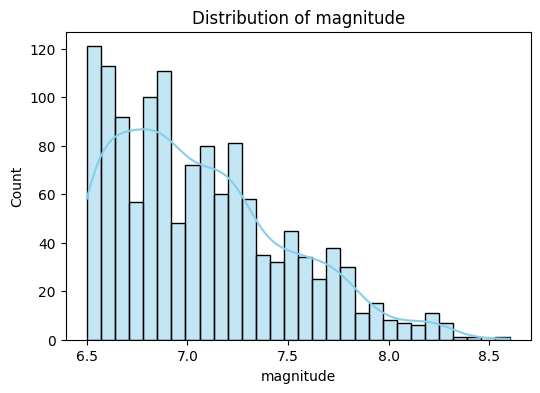

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


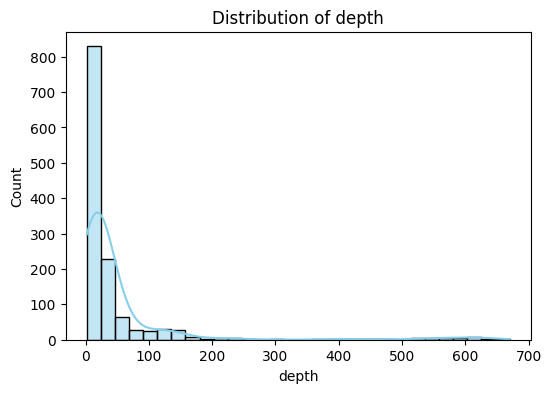

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


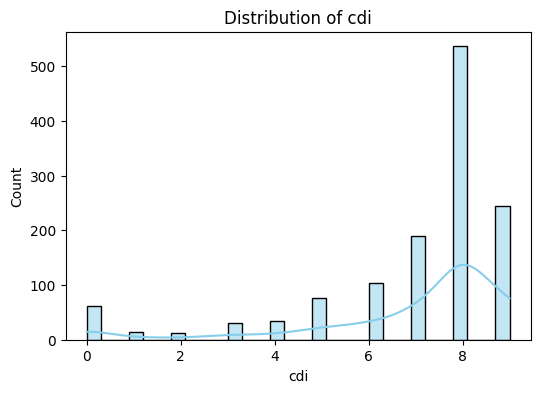

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


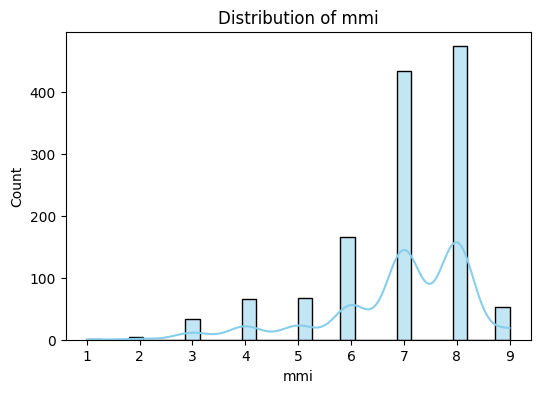

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


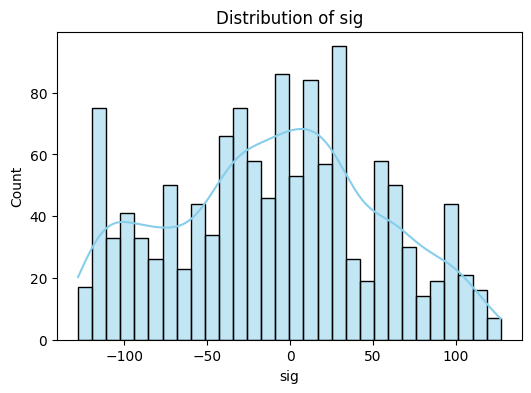

In [61]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


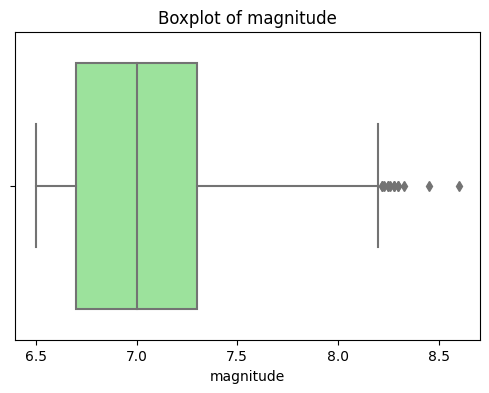

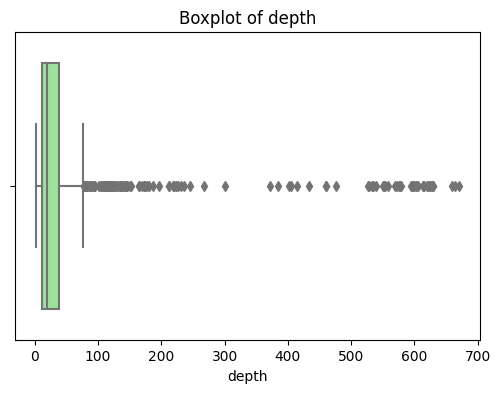

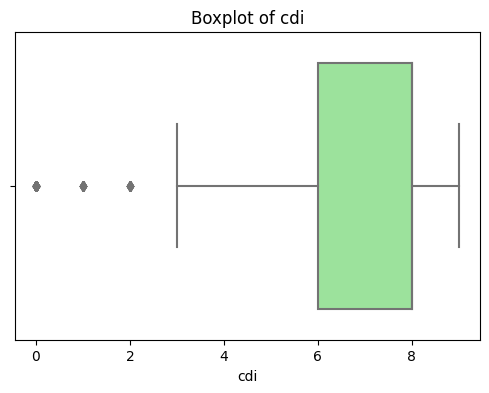

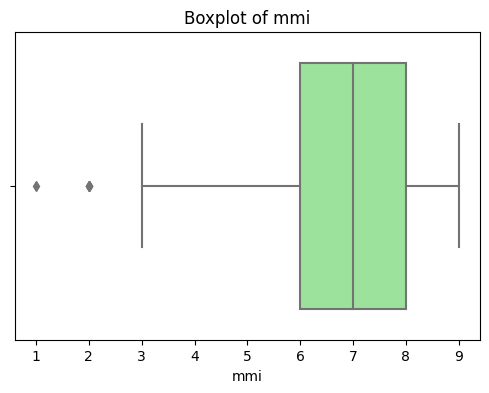

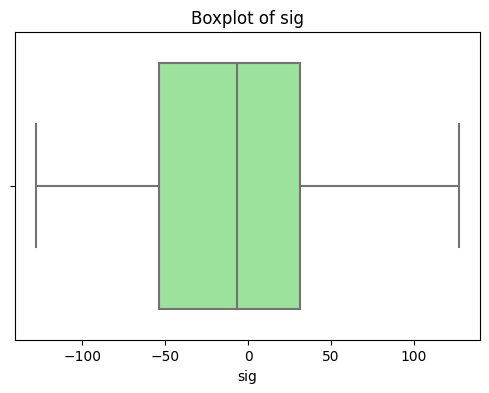

In [62]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [71]:
import matplotlib.pyplot as plt
import itertools

numeric_cols = data.select_dtypes(include='number').columns

feature_pairs = list(itertools.combinations(numeric_cols, 2))

n_pairs = len(feature_pairs)
n_cols = 3
n_rows = (n_pairs // n_cols) + 1

<Figure size 1500x1600 with 0 Axes>

<Figure size 1500x1600 with 0 Axes>

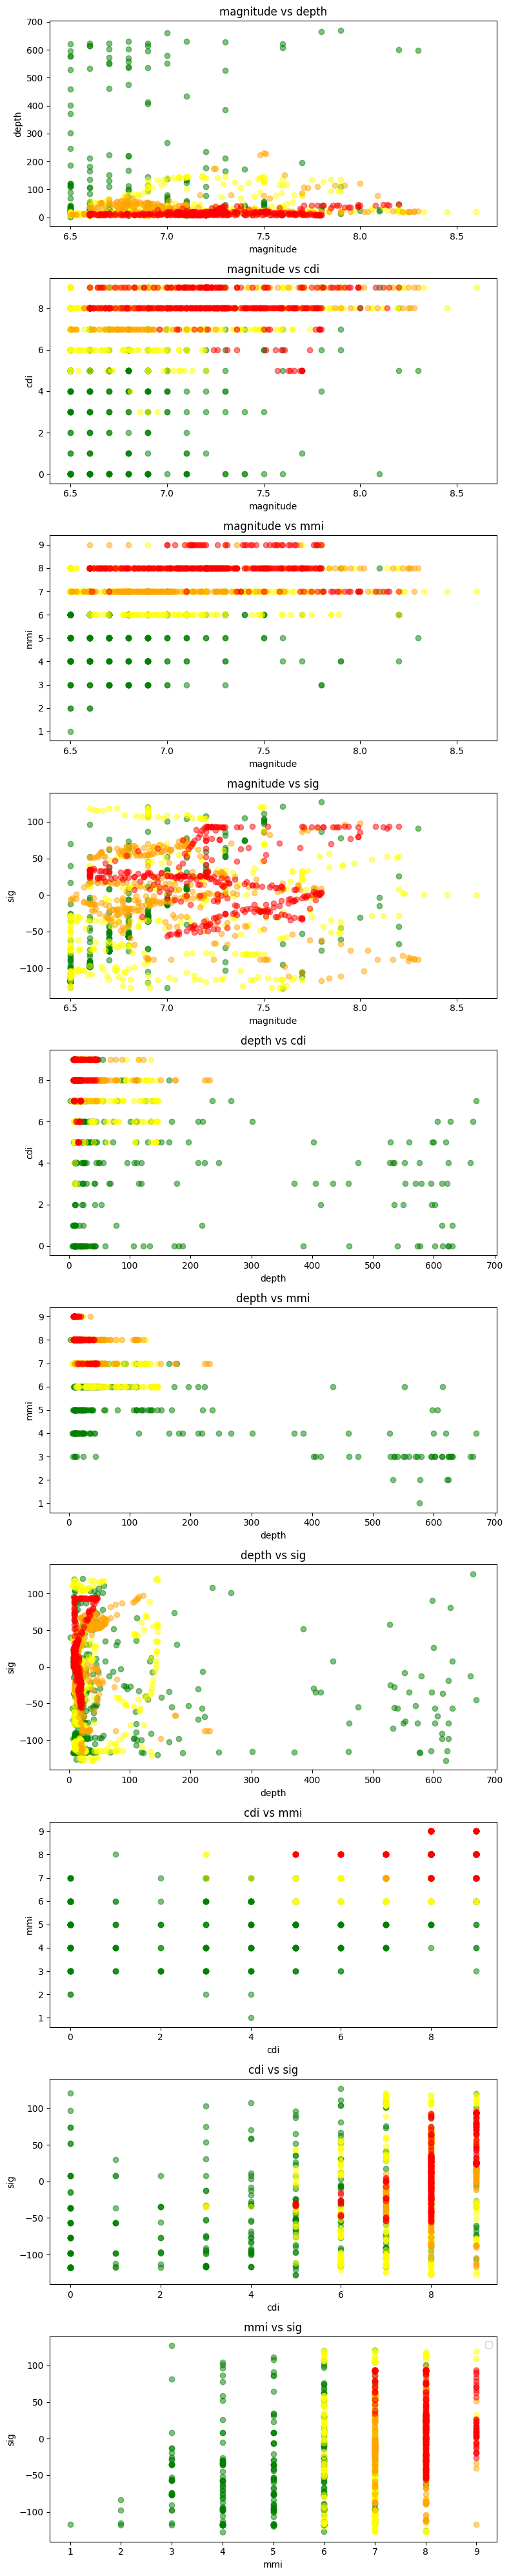

In [74]:

# Figure size: one plot per row
n_pairs = len(feature_pairs)
plt.figure(figsize=(8, n_pairs*4))  # width fixed, height grows with number of plots

# Map alert categories to colors
alert_colors = {'green':'green', 'yellow':'yellow', 'orange':'orange', 'red':'red'}

for i, (x_col, y_col) in enumerate(feature_pairs):
    plt.subplot(n_pairs, 1, i+1)  # single column of subplots
    for alert in alert_colors.keys():
        idx = data['alert'] == alert
        plt.scatter(data.loc[idx, x_col], data.loc[idx, y_col], 
                    color=alert_colors[alert], alpha=0.5, label=alert if i==0 else "")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col}')

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

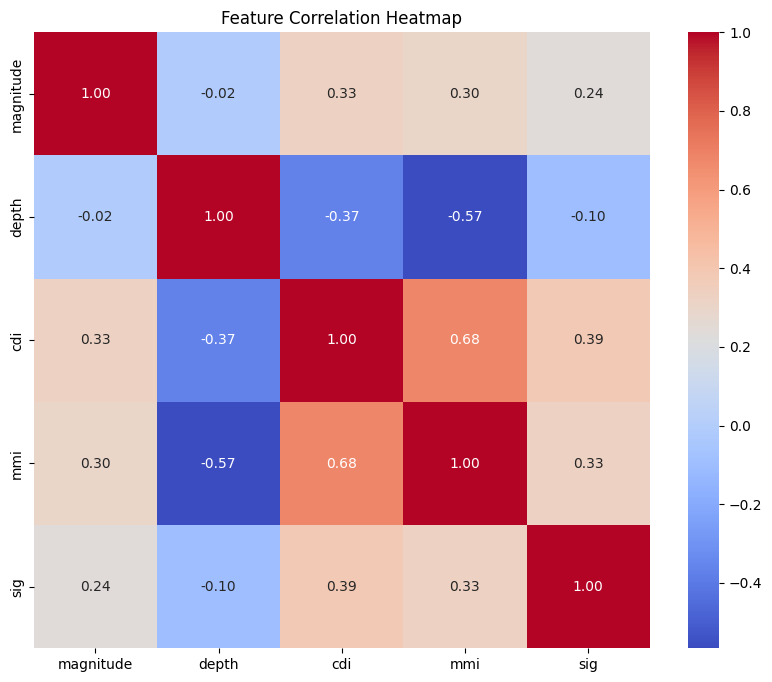

In [75]:

numeric_cols = data.select_dtypes(include='number').columns

corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [106]:


df = data.copy()

le = LabelEncoder()
df['alert_encoded'] = le.fit_transform(df['alert'])  # green=0, orange=1, red=2, yellow=3 (example order)



In [107]:

numeric_cols = df.select_dtypes(include='number').columns


In [108]:

corr_matrix = df[numeric_cols].corr()


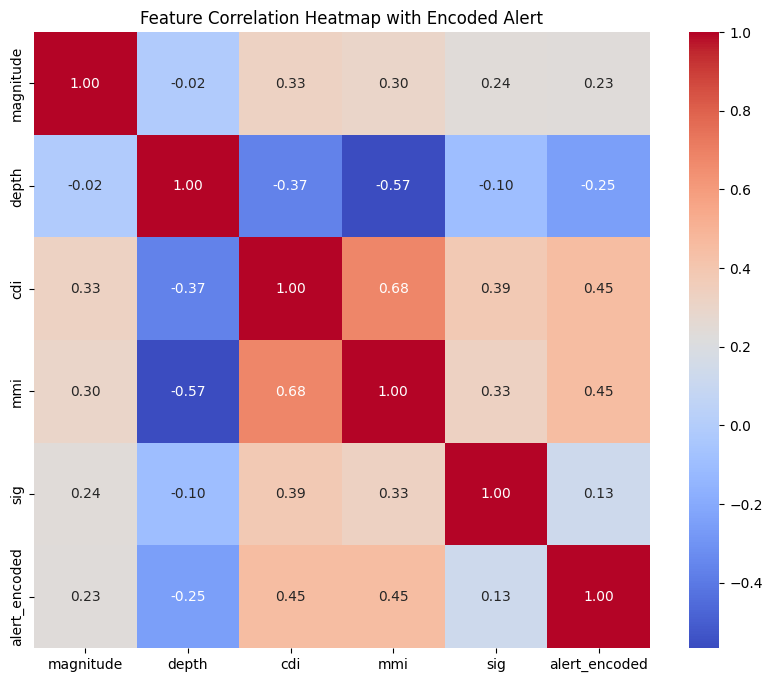

In [109]:

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Heatmap with Encoded Alert")
plt.show()

In [110]:
import numpy as np

mean_mag = df['magnitude'].mean()
std_mag = df['magnitude'].std()

threshold = 3
upper_limit = mean_mag + threshold * std_mag
lower_limit = mean_mag - threshold * std_mag

df['magnitude'] = np.where(df['magnitude'] > upper_limit, upper_limit,
                           np.where(df['magnitude'] < lower_limit, lower_limit, df['magnitude']))

df['magnitude'].head()


0    7.0
1    6.9
2    7.0
3    7.3
4    6.6
Name: magnitude, dtype: float64

In [111]:

Q1 = df['depth'].quantile(0.25)
Q3 = df['depth'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['depth'] = df['depth'].copy()
df.loc[df['depth'] < lower_bound, 'depth'] = lower_bound
df.loc[df['depth'] > upper_bound, 'depth'] = upper_bound


In [112]:
df['sig'].head()

0     0.0
1   -33.0
2   -13.0
3    65.0
4   -98.0
Name: sig, dtype: float64

In [113]:
import numpy as np

mean_sig = df['sig'].mean()
std_sig = df['sig'].std()

threshold = 3
upper_limit_sig = mean_sig + threshold * std_sig
lower_limit_sig = mean_sig - threshold * std_sig

df['sig'] = np.where(df['sig'] > upper_limit_sig, upper_limit_sig,
                     np.where(df['sig'] < lower_limit_sig, lower_limit_sig, df['sig']))

df['sig'].head()


0     0.0
1   -33.0
2   -13.0
3    65.0
4   -98.0
Name: sig, dtype: float64

In [114]:
corr_matrix = df[numeric_cols].corr()


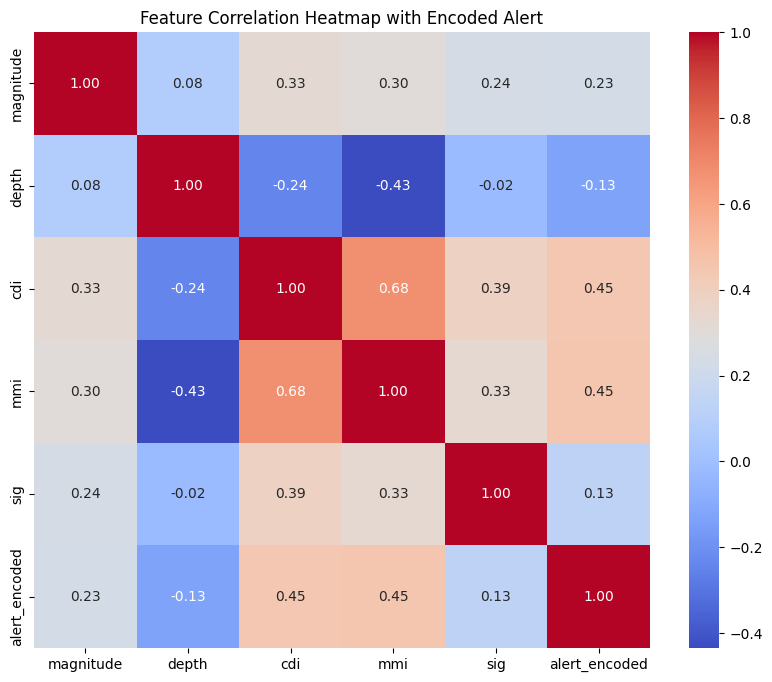

In [115]:

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Heatmap with Encoded Alert")
plt.show()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   magnitude      1300 non-null   float64
 1   depth          1300 non-null   float64
 2   cdi            1300 non-null   float64
 3   mmi            1300 non-null   float64
 4   sig            1300 non-null   float64
 5   alert          1300 non-null   object 
 6   alert_encoded  1300 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 71.2+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

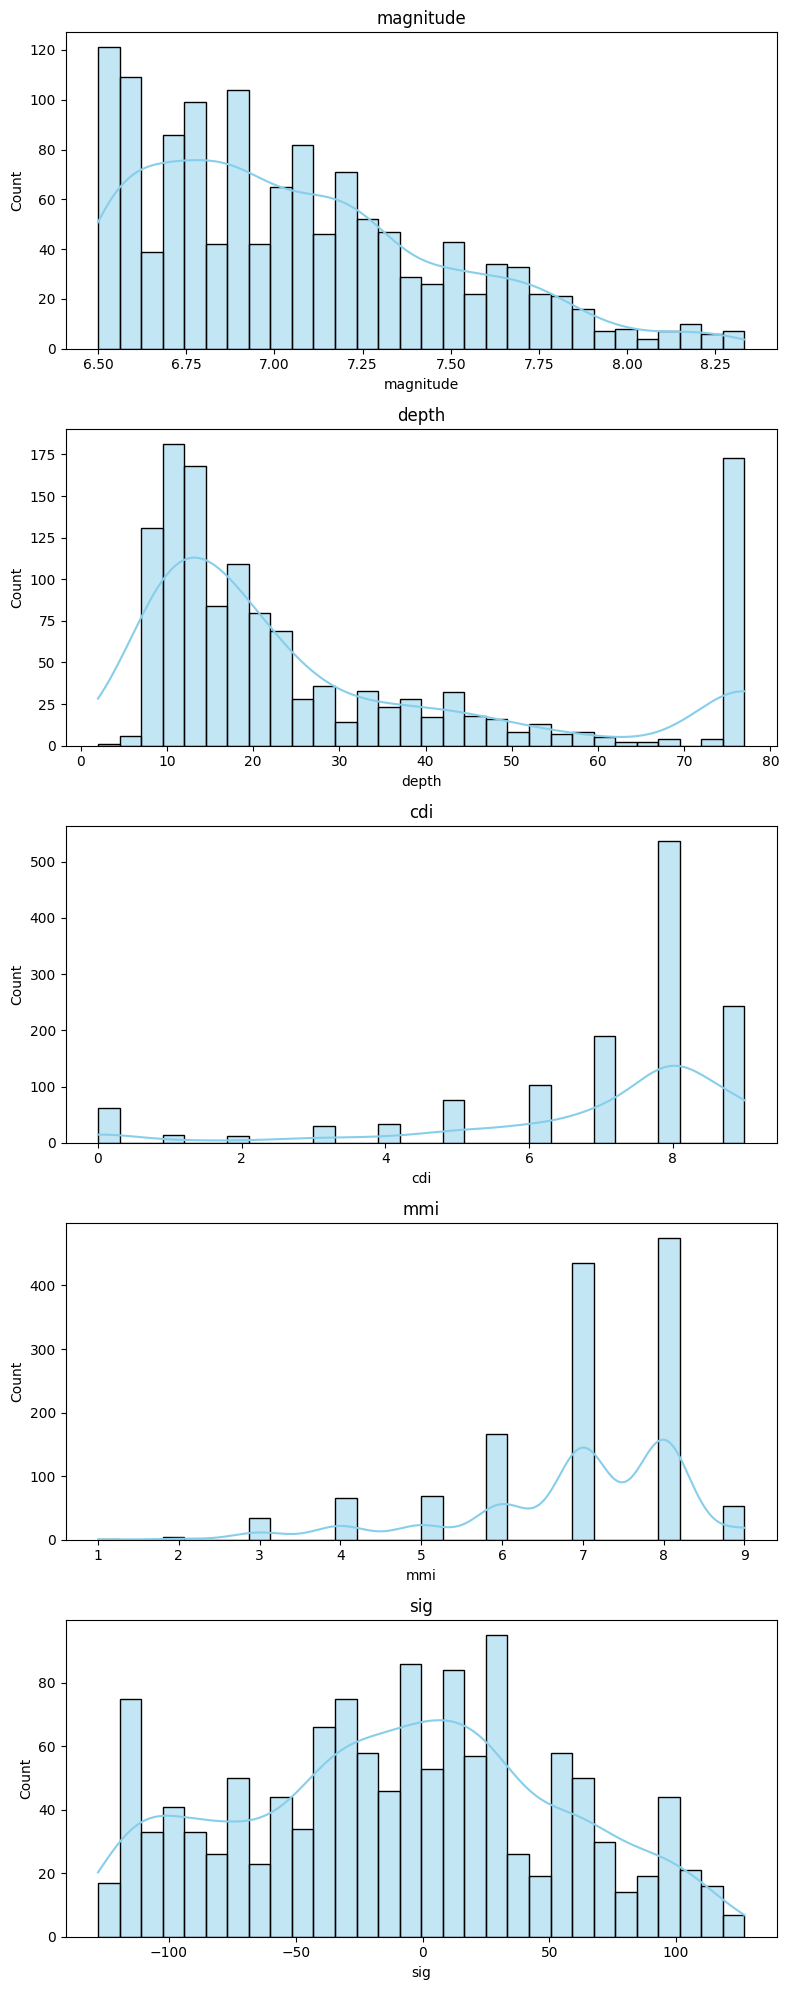

In [126]:

numeric_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']

plt.figure(figsize=(8, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

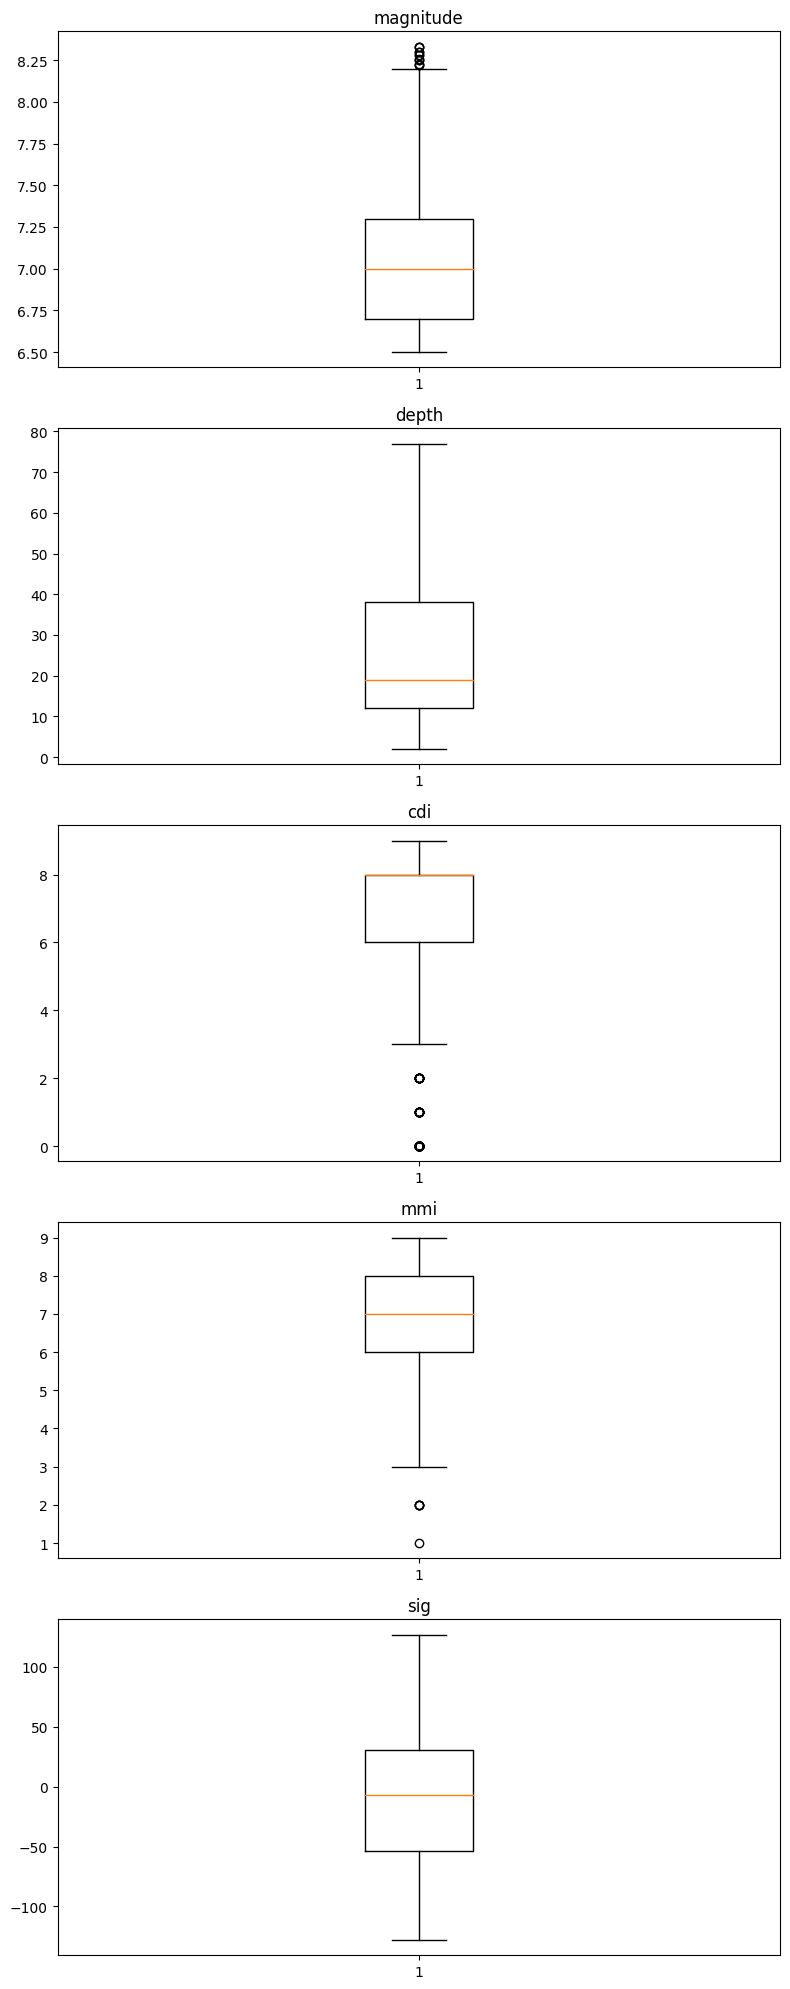

In [127]:

numeric_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']

plt.figure(figsize=(8, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [130]:
df.drop('alert',inplace=True,axis=1)


In [131]:
df.columns

Index(['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'alert_encoded'], dtype='object')

In [147]:
X = df[['magnitude', 'depth', 'cdi', 'mmi', 'sig']]

In [148]:
y=df['alert_encoded']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

In [150]:
rf_model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=None,         
    min_samples_split=2,    
    min_samples_leaf=1,    
    max_features='sqrt',    
    bootstrap=True,         
    random_state=42,
    n_jobs=-1
)

In [151]:

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [152]:

print("----- Random Forest -----")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


----- Random Forest -----
[[43  1  1  4]
 [ 1 44  0  3]
 [ 0  0 47  2]
 [ 1  3  1 44]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.91        49
           1       0.92      0.92      0.92        48
           2       0.96      0.96      0.96        49
           3       0.83      0.90      0.86        49

    accuracy                           0.91       195
   macro avg       0.92      0.91      0.91       195
weighted avg       0.92      0.91      0.91       195



In [153]:

lr_model = LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [154]:

print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


[[41  0  1  7]
 [ 0 21 13 14]
 [ 0  5 42  2]
 [ 6  7  6 30]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        49
           1       0.64      0.44      0.52        48
           2       0.68      0.86      0.76        49
           3       0.57      0.61      0.59        49

    accuracy                           0.69       195
   macro avg       0.69      0.69      0.68       195
weighted avg       0.69      0.69      0.68       195



In [155]:

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [156]:
y_train

976     2
684     1
1252    3
671     1
969     2
       ..
278     0
78      0
796     2
229     2
823     2
Name: alert_encoded, Length: 1105, dtype: int64

In [157]:

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


In [158]:

print("----- XGBoost -----")
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

----- XGBoost -----
[[45  0  1  3]
 [ 0 44  0  4]
 [ 0  2 45  2]
 [ 0  4  2 43]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        49
           1       0.88      0.92      0.90        48
           2       0.94      0.92      0.93        49
           3       0.83      0.88      0.85        49

    accuracy                           0.91       195
   macro avg       0.91      0.91      0.91       195
weighted avg       0.91      0.91      0.91       195



In [163]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("----- KNN -----")
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


----- KNN -----
[[36  2  5  6]
 [ 6 28  4 10]
 [ 0  3 44  2]
 [ 6  6  5 32]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        49
           1       0.72      0.58      0.64        48
           2       0.76      0.90      0.82        49
           3       0.64      0.65      0.65        49

    accuracy                           0.72       195
   macro avg       0.72      0.72      0.71       195
weighted avg       0.72      0.72      0.71       195



In [164]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(3, 11)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Best KNN Parameters:", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_

# Evaluate best KNN
knn_pred_best = best_knn.predict(X_test)
print(confusion_matrix(y_test, knn_pred_best))
print(classification_report(y_test, knn_pred_best))


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
[[35  2  5  7]
 [ 3 35  2  8]
 [ 0  2 46  1]
 [ 4  2  3 40]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        49
           1       0.85      0.73      0.79        48
           2       0.82      0.94      0.88        49
           3       0.71      0.82      0.76        49

    accuracy                           0.80       195
   macro avg       0.81      0.80      0.80       195
weighted avg       0.81      0.80      0.80       195



In [166]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("----- SVM -----")
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


----- SVM -----
[[34  1  7  7]
 [ 6 27  9  6]
 [ 0 13 36  0]
 [12 14  8 15]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        49
           1       0.49      0.56      0.52        48
           2       0.60      0.73      0.66        49
           3       0.54      0.31      0.39        49

    accuracy                           0.57       195
   macro avg       0.57      0.57      0.56       195
weighted avg       0.57      0.57      0.56       195



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)



In [ ]:
print("Best SVM Parameters:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

svm_pred_best = best_svm.predict(X_test)
print(confusion_matrix(y_test, svm_pred_best))
print(classification_report(y_test, svm_pred_best))


In [161]:
import pickle

with open('RandomForestClassifier_model.pkl', 'wb') as f:
    pickle.dump(RandomForestClassifier, f)
